In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

In [2]:
import sys
sys.path.append('/home/chenzhao/csst/simulation/csstemu/')
from CEmulator.Emulator import CEmulator
csstemu = CEmulator(verbose=True)

Loading the Bkmm emulator...
Using 129 training samples.
Loading the Bkmm_halofit emulator...
Using 129 training samples.
Loading the PkcbLin emulator...
Using 513 training samples.
Loading the XihmNL emulator...
Using 65 training samples.
Loading the PkhmNL emulator...
Using 65 training samples.


## $P(k)$ compare with HMCode

In [3]:
%%time
csstemu.set_cosmos(Omegam=0.3)
klist  = np.logspace(-2, 0.9, 1000)
zlist  = np.array([0.0, 1.0, 2.0, 3.0])
pkcbce = csstemu.get_pknl(z=zlist, k=klist, 
                          Pcb=True, lintype='Emulator', 
                          nltype='halofit')
print(pkcbce.shape)

(4, 1000)
CPU times: user 34.1 ms, sys: 2.36 ms, total: 36.5 ms
Wall time: 35.5 ms


In [4]:
%%time
cosmo_class = csstemu.get_cosmos_class(z=zlist, kmax=10.0, non_linear='HMCODE')
pkcbhm  = np.zeros((len(zlist), len(klist)))
pktothm = np.zeros((len(zlist), len(klist)))
h0 = csstemu.Cosmo.h0
for iz in range(len(zlist)):
    pkcbhm [iz] = np.array([cosmo_class.pk_cb(z=zlist[iz], k=ik*h0)*h0*h0*h0 for ik in klist])
    pktothm[iz] = np.array([cosmo_class.pk(z=zlist[iz], k=ik*h0)*h0*h0*h0 for ik in klist])
     

CPU times: user 4.13 s, sys: 13.8 ms, total: 4.14 s
Wall time: 4.15 s


In [5]:
%%time
pktotce = csstemu.get_pknl(z=zlist, k=klist, 
                           Pcb=False, lintype='CLASS', 
                           nltype='halofit', cosmo_class=cosmo_class)
print(pktotce.shape)

(4, 1000)
CPU times: user 3.34 s, sys: 10.9 ms, total: 3.35 s
Wall time: 3.36 s


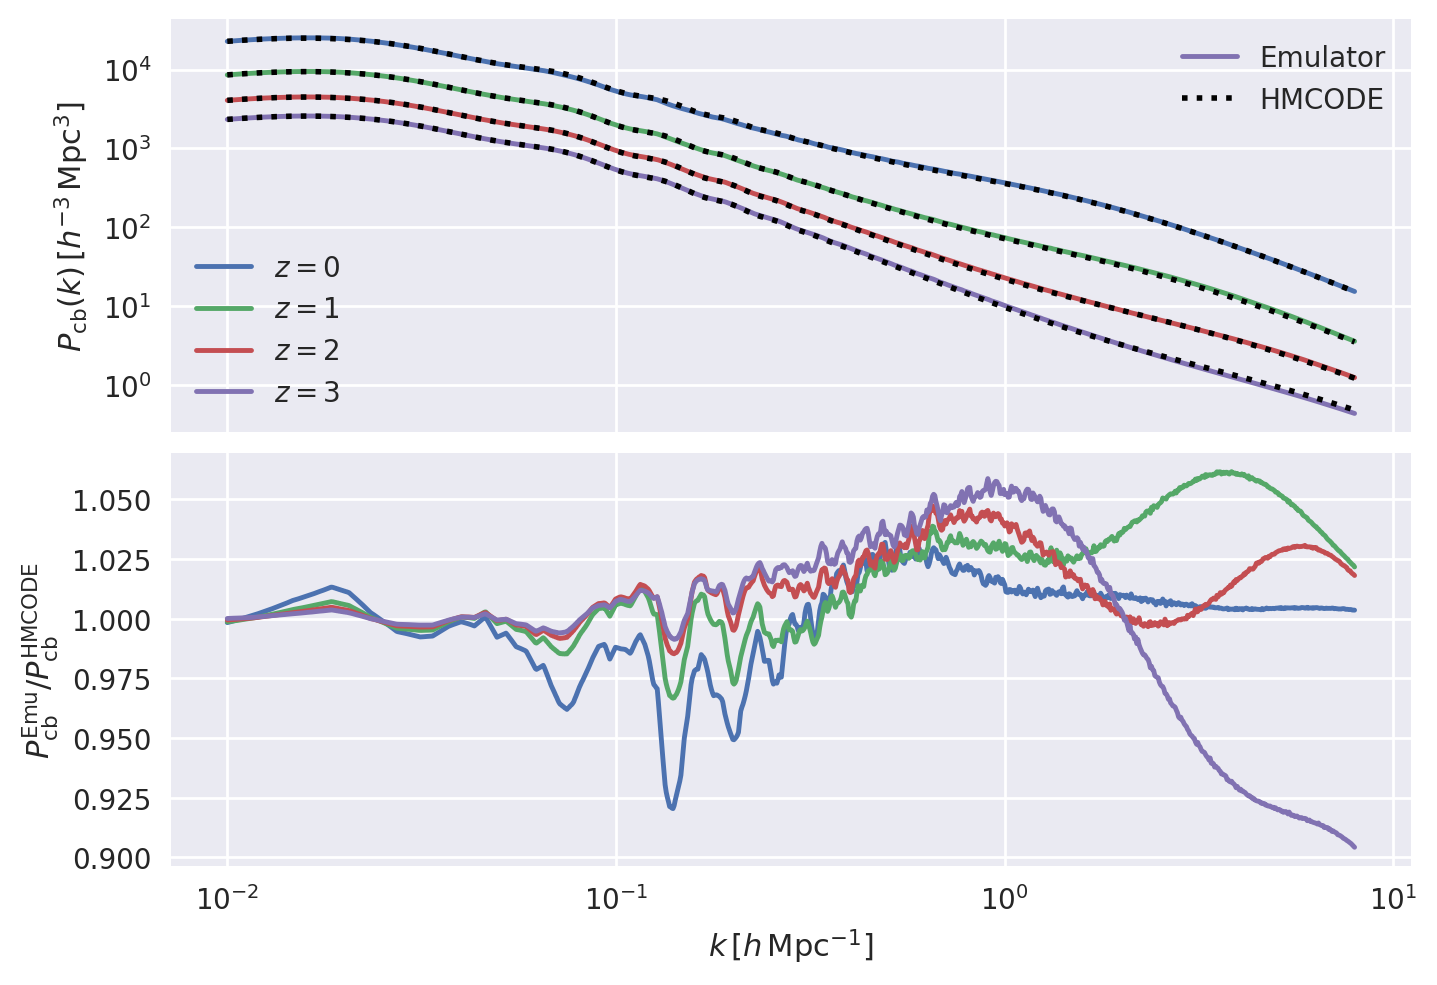

In [18]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('seaborn'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pkcbce[iz], label=r'$z=%.0f$'%(zlist[iz]))
        l2, = plt.plot(klist, pkcbhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0)
    leg2 = plt.legend(loc=3)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm cb}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pkcbce[iz]/pkcbhm[iz], label=r'$z=%.0f$'%(zlist[iz]))
    plt.ylabel(r'$P_{\rm cb}^{\rm Emu}/P_{\rm cb}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.grid(True)

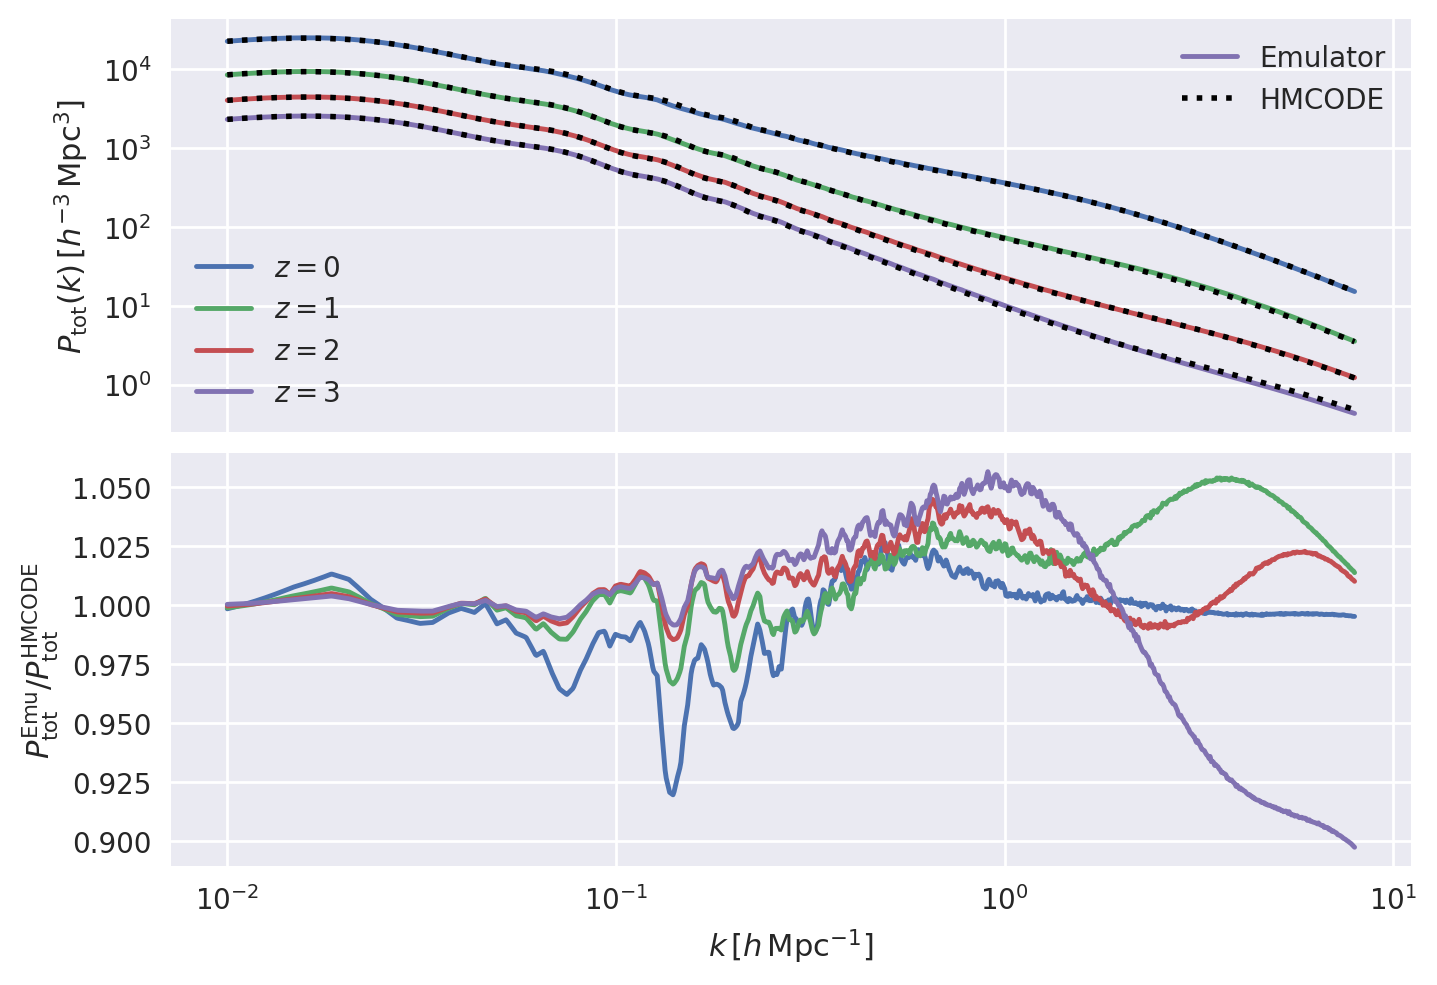

In [17]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('seaborn'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pktotce[iz], label=r'$z=%.0f$'%(zlist[iz]))
        l2, = plt.plot(klist, pktothm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0)
    leg2 = plt.legend(loc=3)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm tot}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pktotce[iz]/pktothm[iz], label=r'$z=%.0f$'%(zlist[iz]))
    plt.ylabel(r'$P_{\rm tot}^{\rm Emu}/P_{\rm tot}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.grid(True)

## match $\sigma_8$

In [19]:
csstemu.set_cosmos(As=None, sigma8=0.73)

The As is set to 1.709492e-09 (sigma8=0.730000) to match the input sigma8=0.730000.


In [20]:
pkcbce = csstemu.get_pknl(z=zlist, k=klist, 
                          Pcb=True, lintype='Emulator', 
                          nltype='halofit')
pktotce = csstemu.get_pknl(z=zlist, k=klist, 
                           Pcb=False, lintype='CLASS', 
                           nltype='halofit')

cosmo_class = csstemu.get_cosmos_class(z=zlist, kmax=10.0, non_linear='HMCODE')
pkcbhm  = np.zeros((len(zlist), len(klist)))
pktothm = np.zeros((len(zlist), len(klist)))
h0 = csstemu.Cosmo.h0
for iz in range(len(zlist)):
    pkcbhm [iz] = np.array([cosmo_class.pk_cb(z=zlist[iz], k=ik*h0)*h0*h0*h0 for ik in klist])
    pktothm[iz] = np.array([cosmo_class.pk(z=zlist[iz], k=ik*h0)*h0*h0*h0 for ik in klist])
     

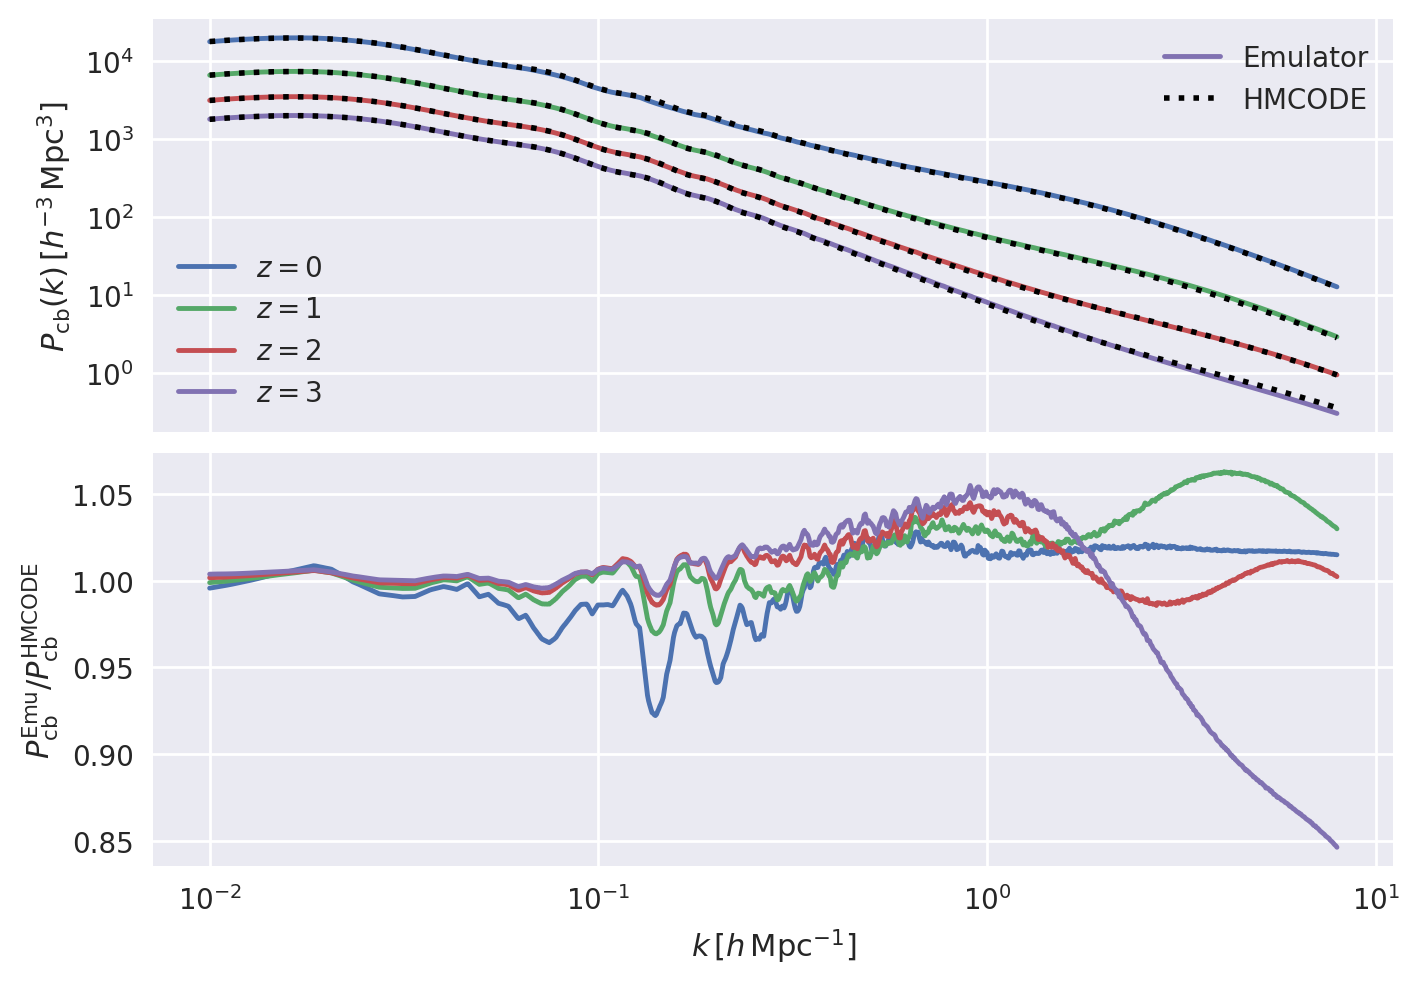

In [21]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('seaborn'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pkcbce[iz], label=r'$z=%.0f$'%(zlist[iz]))
        l2, = plt.plot(klist, pkcbhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0)
    leg2 = plt.legend(loc=3)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm cb}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pkcbce[iz]/pkcbhm[iz], label=r'$z=%.0f$'%(zlist[iz]))
    plt.ylabel(r'$P_{\rm cb}^{\rm Emu}/P_{\rm cb}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.grid(True)

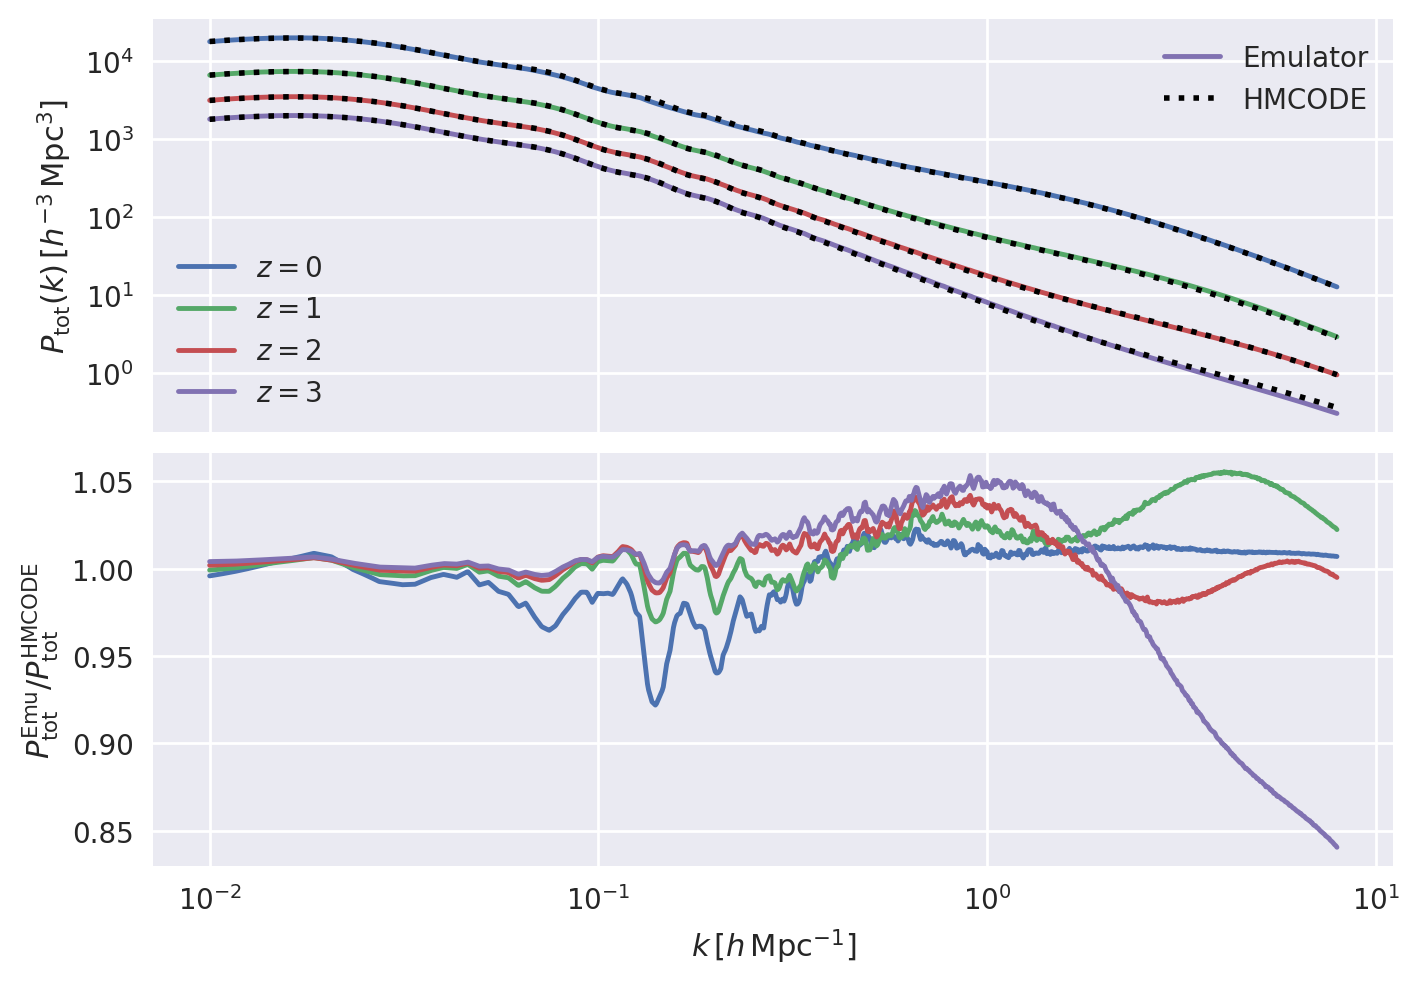

In [22]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('seaborn'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pktotce[iz], label=r'$z=%.0f$'%(zlist[iz]))
        l2, = plt.plot(klist, pktothm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0)
    leg2 = plt.legend(loc=3)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm tot}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlist)):
        l1, = plt.plot(klist, pktotce[iz]/pktothm[iz], label=r'$z=%.0f$'%(zlist[iz]))
    plt.ylabel(r'$P_{\rm tot}^{\rm Emu}/P_{\rm tot}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.grid(True)